In [1100]:
# Import all required libraries

import pandas as pd
import io
import requests
import numpy as np
import os                     

In [1101]:
# Reading the CSV files with transactions, costcenter data, etc.

pcard_data_2017_file = 'enterprise_data/2017pcard_data.csv'
pcard_data_2017 = pd.read_csv(pcard_data_2017_file)


In [1102]:
# Finding costcenters which are not present in costcenter column in techtrades_2016_data_input_CC.csv  2016,2017 if any:

costcenter_data = pd.read_csv('enterprise_data/techtrades_2016_data_input_CC.csv')
costcenter_join = pcard_data_2017['costcenter'].isin(costcenter_data['costcenter'])
missing_costcenters = costcenter_join[costcenter_join == False]

In [1103]:
pcard_data_2016_file = 'enterprise_data/2016pcard_data.csv'
pcard_data_2016 = pd.read_csv(pcard_data_2017_file)
costcenter_data = pd.read_csv('enterprise_data/techtrades_2016_data_input_CC.csv')
costcenter_pcard_2016 = pcard_data_2016['costcenter'].isin(costcenter_data['costcenter'])


In [1104]:
missing_costcenters_2016 = costcenter_pcard_2016[costcenter_pcard_2016 == False]


In [1105]:
# Finding accountname which are not present in account column in techtrades_accounts.csv for 2016,2017 if any:

pcard_data_2017_file = 'enterprise_data/2017pcard_data.csv'
pcard_data_2017 = pd.read_csv(pcard_data_2017_file)
expensetype_data = pd.read_csv('enterprise_data/techtrades_accounts.csv')
expensetype_join = pcard_data_2017['ExpenseType'].isin(expensetype_data['accountname'])


In [1106]:
# Concatenating three techtrades transaction file of the year 2015,2016,2017 in merged_data.csv file

techtrades_2015 = pd.read_csv('enterprise_data/2015pcard_data.csv')
techtrades_2015.columns = map(str.lower, techtrades_2015.columns)
techtrades_2016 = pd.read_csv('enterprise_data/2016pcard_data.csv')
techtrades_2016.columns = map(str.lower, techtrades_2016.columns)
techtrades_2017 = pd.read_csv('enterprise_data/2017pcard_data.csv')
techtrades_2017.columns = map(str.lower, techtrades_2017.columns)
merged_data = pd.concat([techtrades_2015,techtrades_2016,techtrades_2017])
merged_data.to_csv('enterprise_data/merged_data.csv')


In [1107]:
# Finding unique supplier name from the meged data

unique_suppliers = merged_data.vendor.unique()


In [1108]:
columns_new =['supplier_name']
df = pd.DataFrame(unique_suppliers, columns=columns_new)


In [1109]:
# Exporting unique suppier name in unique_suppliers.csv

unique_suppliers_csv = df.to_csv('enterprise_data/unique_suppliers.csv',index=True)

In [1110]:
# Creating a dict with original_supplier as key and parent_supplier as values from unique_suppliers_csv

df = pd.read_csv('enterprise_data/parent_supplier_mapping.csv')
supplier_mapping_dict = dict(zip(df.original_supplier, df.parent_supplier))


In [1111]:
# Creating a dataframe of the merged data with the parent supplier name 

merged_data_with_parent_supplier = pd.DataFrame(merged_data)

In [1112]:
# Mapping the merged data where column name is 'vendor' with the supplier mapping dict
#Removing duplicate transaction

merged_data_with_parent_supplier['parent_supplier_name'] = merged_data_with_parent_supplier['vendor'].map(lambda x: supplier_mapping_dict.get(x, x))

merged_data_with_parent_supplier.drop_duplicates(keep=False, inplace=True)

In [1113]:
# Exporting merged_data_with_parent_supplier to a csv file

merged_data_with_parent_supplier.to_csv('enterprise_data/merged_data_with_parent_supplier.csv',index=True)

In [1114]:
# Importing datatime package

import datetime as dt


In [1115]:
# Filtering transaction data of the year 2017 from the merged data 

merged_data_with_parent_supplier['transaction_date'] = pd.to_datetime(merged_data_with_parent_supplier['transactiondate'])
end_date_2016 = dt.datetime.strptime('31122016', "%d%m%Y").date()
start_date_2018 = dt.datetime.strptime('01012018', "%d%m%Y").date()
transactions_2017 = merged_data_with_parent_supplier[merged_data_with_parent_supplier['transaction_date'] > end_date_2016]
transactions_2017 = transactions_2017[transactions_2017['transaction_date'] < start_date_2018]

/Users/satadipa/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:6: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  
/Users/satadipa/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:7: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  import sys


In [1116]:
# Grouping 2017 transaction data by parent_supplier_name

transactions_2017_grouped_vendor = transactions_2017.groupby(['parent_supplier_name']).sum()

In [1117]:
# Finding the top 10 suppliers on transaction amount

top_10_suppliers_2017 = transactions_2017_grouped_vendor.nlargest(10,'amount')


In [1118]:
# Converting the total amount to two decimal places

top_10_suppliers_2017['total_amount'] = top_10_suppliers_2017['amount'].apply(lambda x: '{:.2f}'.format(x))
del top_10_suppliers_2017['amount'] 
del top_10_suppliers_2017['account'] 
del top_10_suppliers_2017['merchantcode']
del top_10_suppliers_2017['bu']

In [1119]:
# Exporting the top 10 suppliers to a csv file 

top_10_suppliers_2017.to_csv('enterprise_data/top_10_suppliers_2017.csv')
top_10_suppliers_2017

,total_amount
parent_supplier_name,
IBM,4948665.33
CDW Direct,4087333.67
"Apple,Inc",2415929.51
Microsoft,2271565.45
"SMART IMS, INC",1949422.27
CENTURYLINK,1855932.63
Amazon AWS,1799157.23
"Oracle, Inc.",1529637.48
"DataArt Solutions, Inc",1407071.89


In [1120]:
# Finding the business unit which was the top spender in 2017

transactions_2017_grouped_bu = transactions_2017.groupby(['bu']).sum()
top_bu_2017 = transactions_2017_grouped_bu.nlargest(1,'amount')
top_bu_2017['total_amount'] = top_bu_2017['amount'].apply(lambda x: '{:.2f}'.format(x))
del top_bu_2017['amount'] 
del top_bu_2017['merchantcode'] 
del top_bu_2017['account'] 
all_bu = pd.read_csv('enterprise_data/techtrades_bu.csv')
bu_mapping_dict = dict(zip(all_bu.buid, all_bu.name))
top_bu_2017_df = pd.DataFrame(top_bu_2017)
top_bu_2017_df = top_bu_2017_df.reset_index()
top_bu_2017_df['business_unit_name'] = top_bu_2017_df['bu'].map(lambda x: bu_mapping_dict.get(x))
top_bu_2017_df.to_csv('enterprise_data/top_bu_2017.csv')
top_bu_2017_df

,bu,total_amount,business_unit_name
0,100,26639947.48,"Techtrades, Inc. (HQ)"


In [1121]:
# Filtering transaction data of the year 2016 from the merged data 

end_date_2015 = dt.datetime.strptime('31122015', "%d%m%Y").date()
start_date_2017 = dt.datetime.strptime('01012017', "%d%m%Y").date()
transactions_2016 = merged_data_with_parent_supplier[merged_data_with_parent_supplier['transaction_date'] > end_date_2015]
transactions_2016 = transactions_2016[transactions_2016['transaction_date'] < start_date_2017]

end_date_2014 = dt.datetime.strptime('31122014', "%d%m%Y").date()
start_date_2016 = dt.datetime.strptime('01012016', "%d%m%Y").date()
transactions_2015 = merged_data_with_parent_supplier[merged_data_with_parent_supplier['transaction_date'] > end_date_2014]
transactions_2015 = transactions_2015[transactions_2015['transaction_date'] < start_date_2016]

/Users/satadipa/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:5: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """
/Users/satadipa/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:6: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  
/Users/satadipa/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:10: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not 

In [1122]:
# Grouping 2017 transaction data by parent_supplier_name

transactions_2016_grouped_vendor = transactions_2016.groupby(['parent_supplier_name']).sum()


In [1123]:
# Finding the top 10 suppliers on transaction amount
top_10_suppliers_2016 = transactions_2016_grouped_vendor.nlargest(10,'amount')


In [1124]:
# Converting the total amount to two decimal places

top_10_suppliers_2016['total_amount'] = top_10_suppliers_2016['amount'].apply(lambda x: '{:.2f}'.format(x))
del top_10_suppliers_2016['amount'] 
del top_10_suppliers_2016['merchantcode'] 
del top_10_suppliers_2016['bu'] 
del top_10_suppliers_2016['account'] 
top_10_suppliers_2016
top_10_suppliers_2016.to_csv('enterprise_data/top_10_suppliers_2016.csv')

In [1125]:
top_10_suppliers_2016_index = top_10_suppliers_2016.reset_index()


In [1126]:
# Plotting top 10 suppliers for 2016

plot_suppliers_2016 = dict(zip(top_10_suppliers_2016_index.parent_supplier_name, top_10_suppliers_2016_index.total_amount))
x_axis = list(plot_suppliers_2016.keys())
y_axis = [float(x) for x in plot_suppliers_2016.values()]

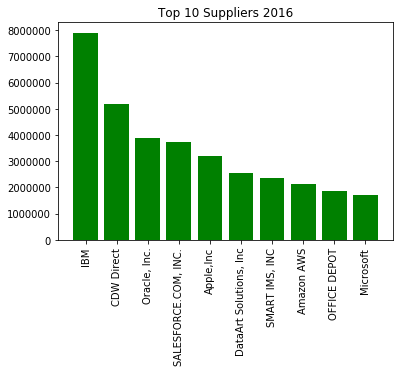

In [1127]:
import matplotlib.pyplot as plt
plt.bar(x_axis, y_axis, color='g')
plt.title('Top 10 Suppliers 2016')
plt.xticks(rotation='vertical')
plt.savefig('/tmp/top_10_suppliers_2016.png')
plt.show()


In [1128]:
# Plotting top 10 suppliers for 2017

top_10_suppliers_2017_index = top_10_suppliers_2017.reset_index()
plot_suppliers_2017 = dict(zip(top_10_suppliers_2017_index.parent_supplier_name, top_10_suppliers_2017_index.total_amount))
x_axis = list(plot_suppliers_2017.keys())
y_axis = [float(x) for x in plot_suppliers_2017.values()]

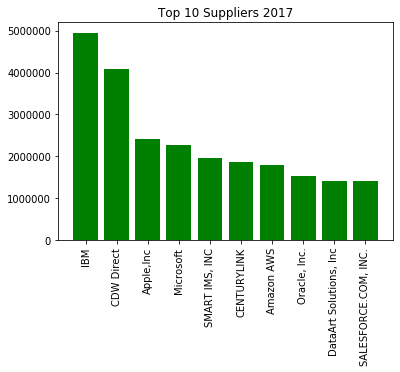

In [1129]:
import matplotlib.pyplot as plt
plt.bar(x_axis, y_axis, color='g')
plt.title('Top 10 Suppliers 2017')
plt.xticks(rotation='vertical')
plt.savefig('/tmp/top_10_suppliers_2017.png')
plt.show()

In [1130]:
# Total count of the transactions in 2016

transactions_2016['transactionid'].count()


350276

In [1131]:
# Total count of the transactions in 2017

transactions_2017['transactionid'].count()

211615

In [1132]:
# Total count of the transactions in 2017

transactions_2015['transactionid'].count()

401455

In [1133]:
# Filterng the top three bu's who spent the maximum on the top 10 suppliers 2017

groupby_column = 'bu'
transactions_supplier_bu_2017 = pd.DataFrame()
for supp in list(top_10_suppliers_2017.index):
    transactions_2017_bu = transactions_2017.loc[transactions_2017['parent_supplier_name'] == supp]
    transactions_2017_grouped_bu = transactions_2017_ibm.groupby([groupby_column]).sum()
    transactions_2017_grouped_bu['total_amount'] = transactions_2017_grouped_bu['amount'].apply(lambda x: '{:.2f}'.format(x))
    del transactions_2017_grouped_bu['amount'] 
    transactions_2017_grouped_bu['supplier_name'] = supp
    transactions_2017_grouped_bu = transactions_2017_grouped_bu.reset_index()
    transactions_2017_grouped_bu.sort_values(by=('total_amount'))
    transactions_supplier_bu_2017 = pd.concat([transactions_supplier_bu_2017, transactions_2017_grouped_bu.head(3)])
transactions_supplier_bu_2017
transactions_supplier_bu_2017.to_csv('enterprise_data/transactions_supplier_bu_2017.csv')

In [1134]:
# Filterng the top three bu's who spent the maximum on the top 10 suppliers 2016
groupby_column = 'bu'
transactions_supplier_bu_2016 = pd.DataFrame()
for supp in list(top_10_suppliers_2016.index):
    transactions_2016_bu = transactions_2016.loc[transactions_2016['parent_supplier_name'] == supp]
    transactions_2016_grouped_bu = transactions_2016_ibm.groupby([groupby_column]).sum()
    transactions_2016_grouped_bu['total_amount'] = transactions_2016_grouped_bu['amount'].apply(lambda x: '{:.2f}'.format(x))
    del transactions_2016_grouped_bu['amount'] 
    transactions_2016_grouped_bu['supplier_name'] = supp
    transactions_2016_grouped_bu = transactions_2016_grouped_bu.reset_index()
    transactions_2016_grouped_bu.sort_values(by=('total_amount'))
    transactions_supplier_bu_2016 = pd.concat([transactions_supplier_bu_2016, transactions_2016_grouped_bu.head(3)])
transactions_supplier_bu_2016
transactions_supplier_bu_2016.to_csv('enterprise_data/transactions_supplier_bu_2016.csv')

In [1135]:
# Filterng the top three costcenter who spent the maximum on the top 10 suppliers 2016

groupby_column = 'costcenter'
transactions_supplier_costcenter_2016 = pd.DataFrame()
for supp in list(top_10_suppliers_2016.index):
    transactions_2016_costcenter = transactions_2016.loc[transactions_2016['parent_supplier_name'] == supp]
    transactions_2016_grouped_costcenter = transactions_2016_costcenter.groupby([groupby_column]).sum()
    transactions_2016_grouped_costcenter['total_amount'] = transactions_2016_grouped_costcenter['amount'].apply(lambda x: '{:.2f}'.format(x))
    del transactions_2016_grouped_costcenter['amount'] 
    transactions_2016_grouped_costcenter['supplier_name'] = supp
    transactions_2016_grouped_costcenter = transactions_2016_grouped_costcenter.reset_index()
    transactions_2016_grouped_costcenter.sort_values(by=('total_amount'))
    transactions_supplier_costcenter_2016 = pd.concat([transactions_supplier_costcenter_2016, transactions_2016_grouped_costcenter.head(3)])
transactions_supplier_costcenter_2016
transactions_supplier_costcenter_2016.to_csv('enterprise_data/transactions_supplier_costcenter_2016.csv')

In [1136]:
# Filterng the top three costcenter who spent the maximum on the top 10 suppliers 2017

groupby_column = 'costcenter'
transactions_supplier_costcenter_2017 = pd.DataFrame()
for supp in list(top_10_suppliers_2017.index):
    transactions_2017_costcenter = transactions_2017.loc[transactions_2017['parent_supplier_name'] == supp]
    transactions_2017_grouped_costcenter = transactions_2017_costcenter.groupby([groupby_column]).sum()
    transactions_2017_grouped_costcenter['total_amount'] = transactions_2017_grouped_costcenter['amount'].apply(lambda x: '{:.2f}'.format(x))
    del transactions_2017_grouped_costcenter['amount'] 
    transactions_2017_grouped_costcenter['supplier_name'] = supp
    transactions_2017_grouped_costcenter = transactions_2017_grouped_costcenter.reset_index()
    transactions_2017_grouped_costcenter.sort_values(by=('total_amount'))
    transactions_supplier_costcenter_2017 = pd.concat([transactions_supplier_costcenter_2017, transactions_2017_grouped_costcenter.head(3)])
transactions_supplier_costcenter_2017
transactions_supplier_costcenter_2017.to_csv('enterprise_data/transactions_supplier_costcenter_2017.csv')


In [1137]:
# Filterng the top three expensetype who spent the maximum on the top 10 suppliers 2017

groupby_column = 'expensetype'
transactions_supplier_expensetype_2017 = pd.DataFrame()

for supp in list(top_10_suppliers_2017.index):
    transactions_2017_expensetype = transactions_2017.loc[transactions_2017['parent_supplier_name'] == supp]
    transactions_2017_grouped_expensetype = transactions_2017_expensetype.groupby([groupby_column]).sum()
    transactions_2017_grouped_expensetype['total_amount'] = transactions_2017_grouped_expensetype['amount'].apply(lambda x: '{:.2f}'.format(x))
    del transactions_2017_grouped_expensetype['amount'] 
    transactions_2017_grouped_expensetype['supplier_name'] = supp
    transactions_2017_grouped_expensetype = transactions_2017_grouped_expensetype.reset_index()
    transactions_2017_grouped_expensetype.sort_values(by=('total_amount'))
    transactions_supplier_expensetype_2017 = pd.concat([transactions_supplier_expensetype_2017, transactions_2017_grouped_expensetype.head(3)])
transactions_supplier_expensetype_2017
transactions_supplier_expensetype_2017.to_csv('enterprise_data/transactions_supplier_expensetype_2017.csv')

In [1138]:
# Filterng the top three costcenter who spent the maximum on the top 10 suppliers 2016

groupby_column = 'expensetype'
transactions_supplier_expensetype_2016 = pd.DataFrame()

for supp in list(top_10_suppliers_2016.index):
    transactions_2016_expensetype = transactions_2016.loc[transactions_2016['parent_supplier_name'] == supp]
    transactions_2016_grouped_expensetype = transactions_2016_expensetype.groupby([groupby_column]).sum()
    transactions_2016_grouped_expensetype['total_amount'] = transactions_2016_grouped_expensetype['amount'].apply(lambda x: '{:.2f}'.format(x))
    del transactions_2016_grouped_expensetype['amount'] 
    transactions_2016_grouped_expensetype['supplier_name'] = supp
    transactions_2016_grouped_expensetype = transactions_2016_grouped_expensetype.reset_index()
    transactions_2016_grouped_expensetype.sort_values(by=('total_amount'))
    transactions_supplier_expensetype_2016 = pd.concat([transactions_supplier_expensetype_2016, transactions_2016_grouped_expensetype.head(3)])
transactions_supplier_expensetype_2016.to_csv('enterprise_data/transactions_supplier_expensetype_2016.csv')
transactions_supplier_expensetype_2016


,expensetype,merchantcode,bu,account,total_amount,supplier_name
0,IT Hardware Desktops,326538,620,51666,3181.82,IBM
1,IT Hardware Other,451936,1110,94630,655632.44,IBM
2,IT Hardware Servers,180882840,164960,13948200,4866608.34,IBM
0,Airfare,811410,3980,292740,14032.51,CDW Direct
1,Building Maintenance,489246,1200,86336,1332.43,CDW Direct
2,Building Suppliles,1535344,5120,279680,74542.43,CDW Direct
0,IT Services,52477,100,8640,231526.00,"Oracle, Inc."
1,IT Software,472293,960,77670,3660673.00,"Oracle, Inc."
0,Advertisement,200601,1230,80520,3092.27,"SALESFORCE.COM, INC."
1,Airfare,135268103,879280,70033740,1705058.94,"SALESFORCE.COM, INC."
